# TELECOM CHURN PREDICTION

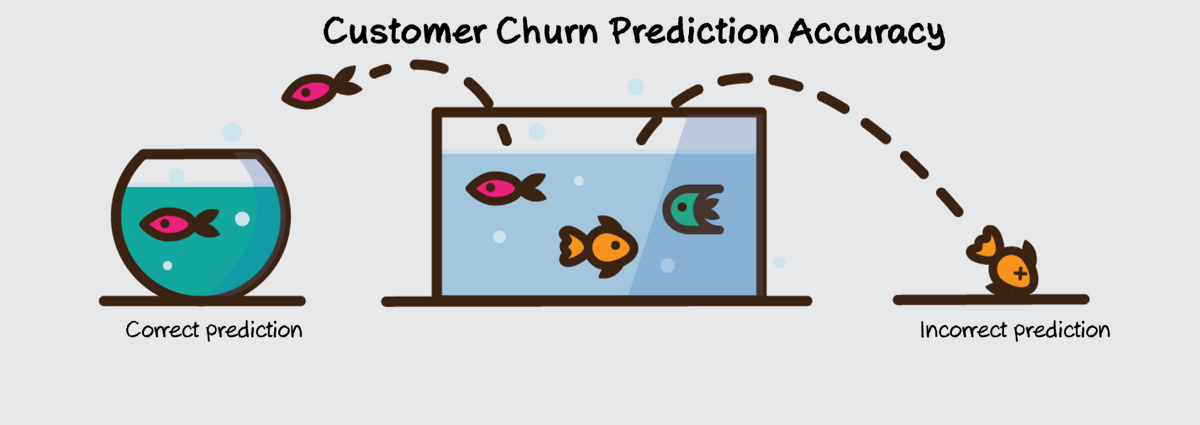

## PROBLEM STATEMENT:


Based On Given customer’s telecom service details predict customer with high Churn risk to prevent them from churn

## Steps of the project

The project consists of the following sections:

1.Data Reading

2.Exploratory Data Analysis

3.Data Visualization

4.Label encoding and standardization

6.Handle imabalnced data using SMOTE

7.Splitting the data in training and testing sets

8.Implementation Applying ML Algorithms

9.Comparing accuracy of different ML algorthms

10.Performance of the model

11.conclusion


## DATA SUMMARY

This dataset contains 2 tables, in CSV format:

The Customer Churn table- contains information on all 7,043 customers from a Telecommunications company in California in Q2 2022

Each record represents one customer, and contains details about their demographics, location, tenure, subscription services, status for the quarter (joined, stayed, or churned), and more!

The Zip Code Population table contains- complimentary information on the estimated populations for the California zip codes in the Customer Churn table

# Importing Libraries and creating dataframe

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_column", None)

In [15]:
##loading Data

churn_data= pd.read_csv(r"C:\Users\tejas\Documents\PGA12_new\ML\ML capstone project 1\archive\telecom_customer_churn.csv",
                       index_col=0)
churn_data.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [16]:
zipcode_data= pd.read_csv(r"C:\Users\tejas\Documents\PGA12_new\ML\ML capstone project 1\archive\telecom_zipcode_population.csv")
zipcode_data.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


# Combining both data files into one consolidated dataframe

In [17]:
telecom_data= pd.merge(churn_data, zipcode_data, how= 'inner', on= 'Zip Code' )
telecom_data.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.3,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,Male,32,No,0,Frazier Park,93225,34.827662,-118.999073,0,10,Offer D,Yes,45.69,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,95.10,865.1,43.25,0,456.90,1278.75,Stayed,NaN,NaN,4498
2,Female,72,Yes,0,Frazier Park,93225,34.827662,-118.999073,8,58,Offer B,Yes,47.34,Yes,Yes,Fiber Optic,28.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,100.40,5749.8,0.00,0,2745.72,8495.52,Stayed,NaN,NaN,4498
3,Male,46,No,0,Frazier Park,93225,34.827662,-118.999073,0,59,None,Yes,9.70,No,Yes,DSL,6.0,No,No,Yes,No,No,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,61.35,3645.5,0.00,0,572.30,4217.80,Stayed,NaN,NaN,4498
4,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.4,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297


In [18]:
telecom_data.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.3,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,Male,32,No,0,Frazier Park,93225,34.827662,-118.999073,0,10,Offer D,Yes,45.69,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,95.10,865.1,43.25,0,456.90,1278.75,Stayed,NaN,NaN,4498
2,Female,72,Yes,0,Frazier Park,93225,34.827662,-118.999073,8,58,Offer B,Yes,47.34,Yes,Yes,Fiber Optic,28.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,100.40,5749.8,0.00,0,2745.72,8495.52,Stayed,NaN,NaN,4498
3,Male,46,No,0,Frazier Park,93225,34.827662,-118.999073,0,59,None,Yes,9.70,No,Yes,DSL,6.0,No,No,Yes,No,No,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,61.35,3645.5,0.00,0,572.30,4217.80,Stayed,NaN,NaN,4498
4,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.4,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297


In [19]:
telecom_data.tail()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
7038,Female,64,No,0,Carpinteria,93013,34.441398,-119.513163,0,15,None,Yes,13.58,Yes,Yes,DSL,19.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,48.85,631.40,32.09,0,203.70,803.01,Stayed,NaN,NaN,17409
7039,Male,76,No,0,Meadow Valley,95956,39.937017,-121.058043,0,39,None,Yes,20.06,Yes,Yes,Fiber Optic,3.0,No,Yes,No,No,No,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,90.70,3413.25,0.00,0,782.34,4195.59,Stayed,NaN,NaN,301
7040,Male,22,No,0,Meadow Valley,95956,39.937017,-121.058043,0,10,None,Yes,17.98,Yes,Yes,Fiber Optic,26.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.05,786.30,0.00,0,179.80,966.10,Stayed,NaN,NaN,301
7041,Male,39,No,0,Meadow Valley,95956,39.937017,-121.058043,0,38,None,Yes,33.71,No,Yes,Fiber Optic,17.0,No,No,No,No,No,No,No,Yes,One Year,Yes,Bank Withdrawal,70.45,2597.60,0.00,0,1280.98,3878.58,Churned,Price,Lack of affordable download/upload speed,301
7042,Female,56,Yes,1,Meadow Valley,95956,39.937017,-121.058043,2,67,Offer A,Yes,48.75,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,Yes,Bank Withdrawal,19.25,1372.90,0.00,0,3266.25,4639.15,Stayed,NaN,NaN,301


In [20]:
telecom_data.shape

(7043, 38)

As shown above, the data set contains 7043 observations and 38 columns.

Dependent Valriable is "Customer Status" Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined

# Exploratory Data Analysis

In [21]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-null   objec

In [22]:
telecom_data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Population
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056,22139.603294
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542,21152.392837
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000,11.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000,2344.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000,17554.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,36125.000000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,105285.000000


In [23]:
telecom_data.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming 

### Checking Duplicates in data

In [24]:
telecom_data.duplicated().sum()

0

### Handle missing values

In [25]:
telecom_data.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                   

### Impute missing values



In [26]:
# If the customer is not subscribed to home phone service then Avg Monthly Long Distance Charges will be zero.
#hence replace null value with 0

telecom_data['Avg Monthly Long Distance Charges']= telecom_data['Avg Monthly Long Distance Charges'].fillna(0)

In [27]:
# If the customer is not subscribed to home phone service then Multiple Lines will be with 'No Phone Services'
#hence replace null value with 0

telecom_data['Multiple Lines']= telecom_data['Multiple Lines'].fillna('No Phone Services')

In [28]:
#When customer  not subscribed to internet service then impute missing values as below

# Avg Monthly GB Download= 0
#Internet Type- 'No Internet Services'
# Online Security= "No Internet Services"
# Online Backup= "No Internet Services"
# Device Protection Plan= "No Internet Services"
# Premium Tech Support="No Internet Services"
# Streaming TV= "No Internet Services"
# Streaming Movies= "No Internet Services"
# Streaming Music= "No Internet Services"
# Unlimited Data= "No Internet Services"




In [29]:
telecom_data['Avg Monthly GB Download']= telecom_data['Avg Monthly GB Download'].fillna(0)

In [30]:
telecom_data[['Internet Type','Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data']]= telecom_data[['Internet Type','Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data']].fillna('No Internet Services')

In [31]:
#replace null values of churn with Not Applicable:

telecom_data[['Churn Category', 'Churn Reason']]= telecom_data[['Churn Category', 'Churn Reason']].fillna('Not Applicable')

In [32]:
#now again check if anything missing in the data and dtype

telecom_data.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

No missing value in data


In [33]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-null   objec

# Data Visualization

### pie chart of how many % of people churned and not churned

In [34]:
#Replace 'Stayed' and 'Joined' as not churned to estimate counts of customers who have churned and not churned
status = []
for i in telecom_data['Customer Status']:
    if i == 'Churned':
        status.append('Churned')
    else:
        status.append('Not Churned')



In [35]:
telecom_data['is_churned'] = status
telecom_data['is_churned'].value_counts()


Not Churned    5174
Churned        1869
Name: is_churned, dtype: int64

<AxesSubplot:ylabel='is_churned'>

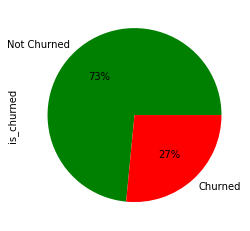

In [36]:
telecom_data['is_churned'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors = ["Green", "red"])

### pie chart of how many % of people churned as per given customer status

<AxesSubplot:ylabel='Customer Status'>

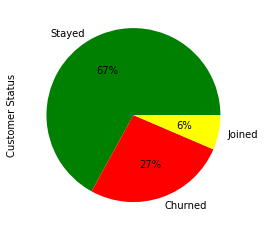

In [37]:
telecom_data['Customer Status'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors = ["Green", "red", "Yellow"])

From above charts we can clearly state that data highly imbalance and if we train the model on this data then accuracy will 
not be good.

Further we need apply SMOTE technique to increase the accuracy of the model.


### Customer personal details Information visualization — Categorical variables

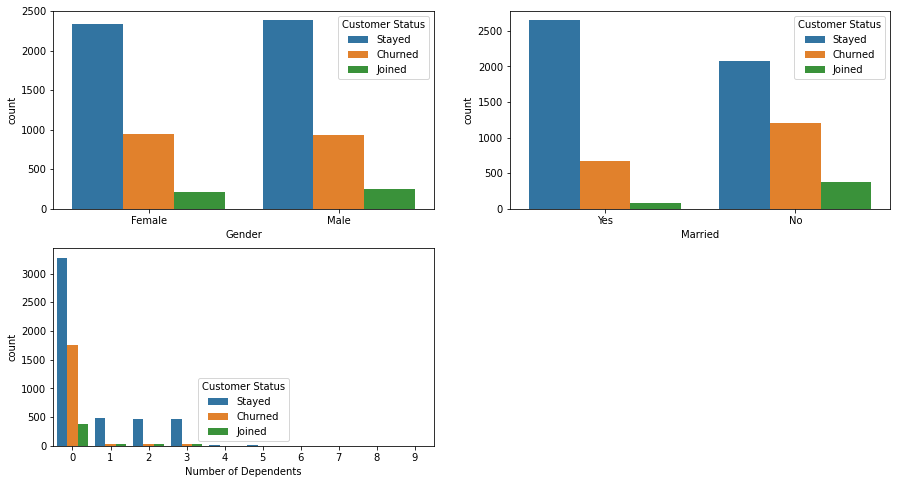

In [38]:

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)    # 1row, 3 space and 1st plot
ax= sns.countplot('Gender', data=telecom_data, hue='Customer Status')


plt.subplot(2,2,2)
ax=sns.countplot('Married', data=telecom_data, hue='Customer Status')


plt.subplot(2,2,3)
ax=sns.countplot('Number of Dependents', data=telecom_data, hue='Customer Status')



1.Almost similer percentage of churn is shown for both female and male

2.Married Customers churn less than unmarried customer

3.Customer with no dependents has churned more

## Customer telecom service Information visualization — Categorical variables



<AxesSubplot:xlabel='Unlimited Data', ylabel='count'>

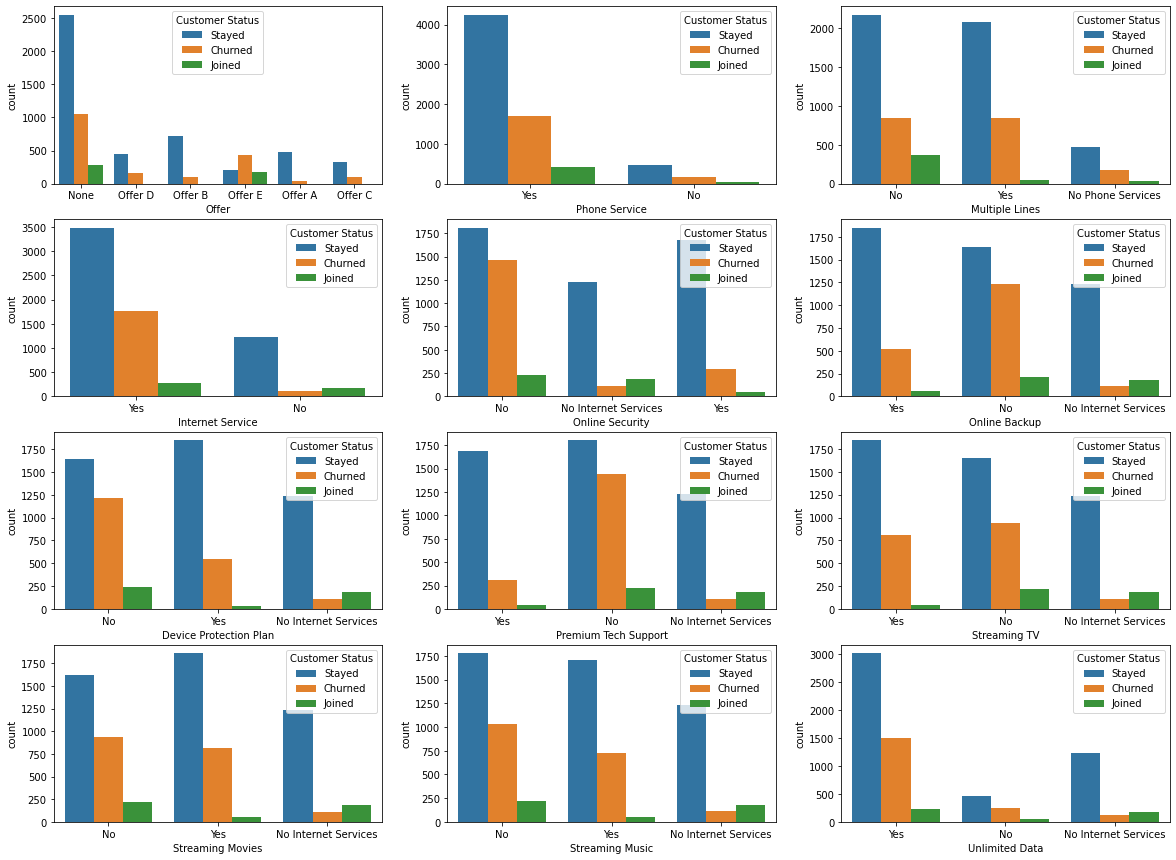

In [39]:

plt.figure(figsize=(20,15))

plt.subplot(4,3,1)    # 1row, 3 space and 1st plot
sns.countplot('Offer', data=telecom_data, hue='Customer Status')

plt.subplot(4,3,2)
sns.countplot('Phone Service', data=telecom_data, hue='Customer Status')

plt.subplot(4,3,3)
sns.countplot('Multiple Lines', data=telecom_data, hue='Customer Status')

plt.subplot(4,3,4)
sns.countplot('Internet Service', data=telecom_data, hue='Customer Status')


plt.subplot(4,3,5)
sns.countplot('Online Security', data=telecom_data, hue='Customer Status')

plt.subplot(4,3,6)
sns.countplot('Online Backup', data=telecom_data, hue='Customer Status')

plt.subplot(4,3,7)
sns.countplot('Device Protection Plan', data=telecom_data, hue='Customer Status')

plt.subplot(4,3,8)
sns.countplot('Premium Tech Support', data=telecom_data, hue='Customer Status')

plt.subplot(4,3,9)
sns.countplot('Streaming TV', data=telecom_data, hue='Customer Status')

plt.subplot(4,3,10)
sns.countplot('Streaming Movies', data=telecom_data, hue='Customer Status')

plt.subplot(4,3,11)
sns.countplot('Streaming Music', data=telecom_data, hue='Customer Status')

plt.subplot(4,3,12)
sns.countplot('Unlimited Data', data=telecom_data, hue='Customer Status')



We can extract the following conclusions by analyzing customer account attributes:
    
1.Customer without any offer has high churning rate

2.Customer with Phone service and Internet service have more churning rate

3 Customer with Internet service but without 'Online Security', 'Online Backup','Device Protection Plan', 
'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music' has high churn rate

4.customer with unlimited plans have higher churn rates

<AxesSubplot:xlabel='Internet Type', ylabel='count'>

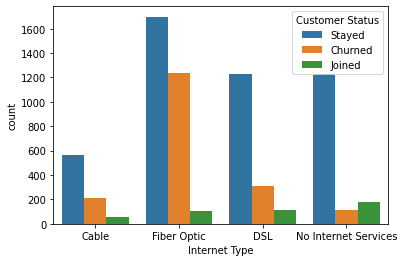

In [40]:
sns.countplot('Internet Type', data=telecom_data, hue='Customer Status')

customer with Fiber Optioc Internet Type have higher churn rate

### Customer Payment info visualization — Categorical variable

<AxesSubplot:xlabel='Payment Method', ylabel='count'>

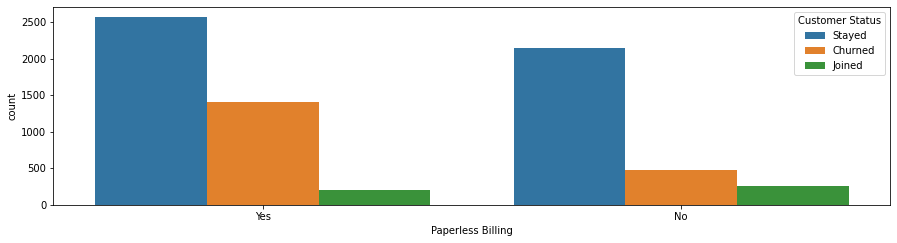

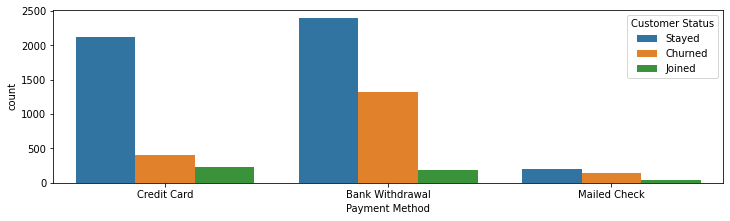

In [41]:

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)    # 1row, 3 space and 1st plot
sns.countplot('Paperless Billing', data=telecom_data, hue='Customer Status')

plt.figure(figsize=(12,7))
plt.subplot(2,1,1)  
sns.countplot('Payment Method', data=telecom_data, hue='Customer Status')



#Customer with paperleass Billing has high churn rate

#Customer with payment method "Bank Withdrawal" has high churn rate

# Identify high value customers

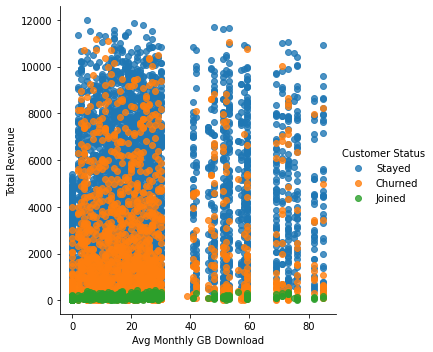

In [42]:
sns.lmplot( data= telecom_data, x= 'Avg Monthly GB Download', y = 'Total Revenue', fit_reg= False, #No Regression Line 
          hue= 'Customer Status')

plt.show()

#Customer  with high GB download are less likely to leave the company.
#Churn customer’s having low average GB download around 30GB with  total revenue around 8000

<Figure size 720x432 with 0 Axes>

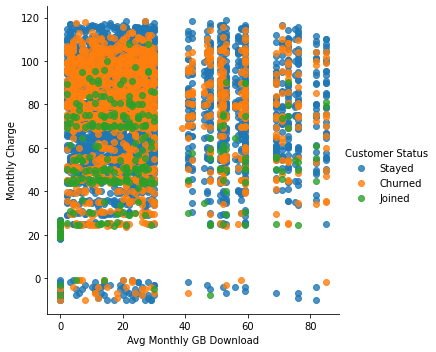

In [43]:
plt.figure(figsize=(10,6))
sns.lmplot(x="Avg Monthly GB Download", y="Monthly Charge", data=telecom_data, hue="Customer Status", fit_reg=False)
plt.show()

#The churn rate tends to be larger when monthly charges are high

<AxesSubplot:xlabel='Contract', ylabel='Monthly Charge'>

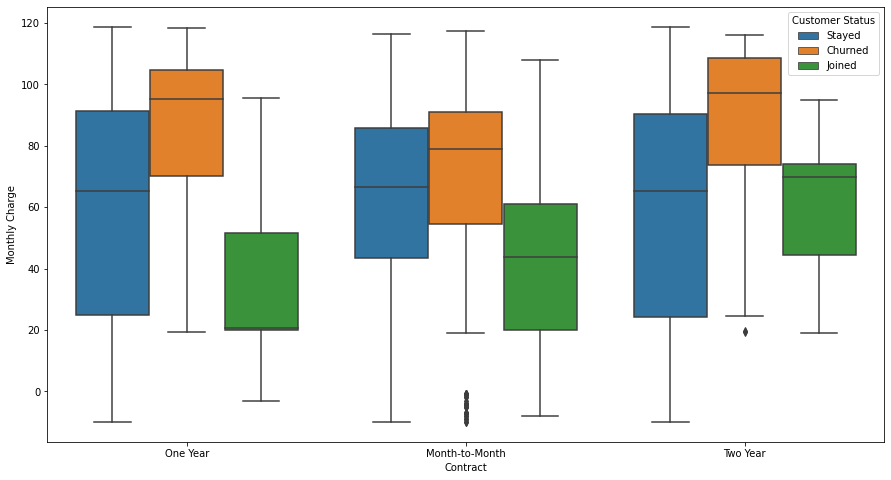

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Contract", y="Monthly Charge",hue="Customer Status", data=telecom_data)

#For All Contract type, Churned customers paid highest monthly charge on an average

### Churned Reason

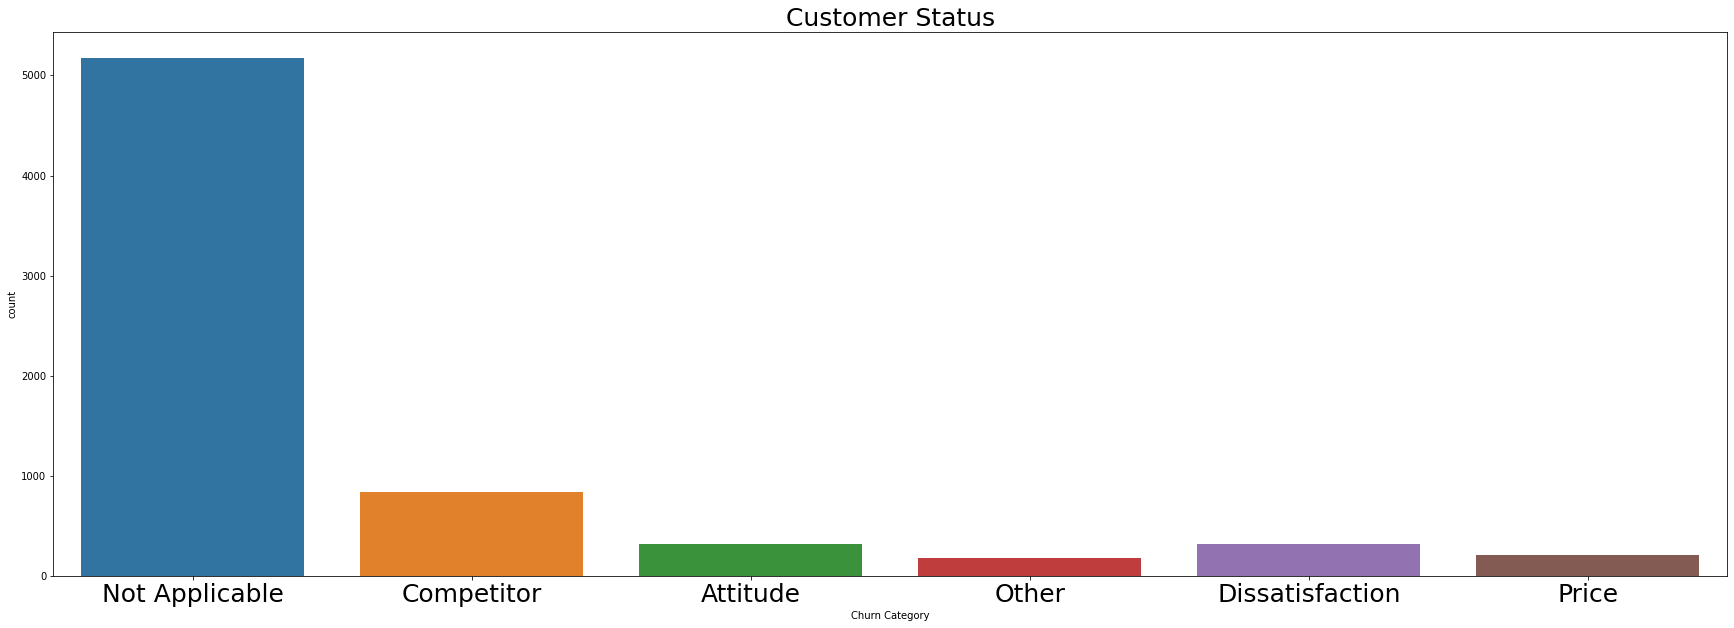

In [45]:
plt.figure(figsize=(30,10))
ax= sns.countplot(data= telecom_data,x= "Churn Category")
plt.xticks(fontsize = 25)
plt.title('Customer Status', fontsize = 25)
plt.show()


#Price is not a moajor factor for customers to leave, however we need more info about Competitor to analyse the churn reason

#Here status 'Not Applicable' means customer is not churn so the blank reason updated NA

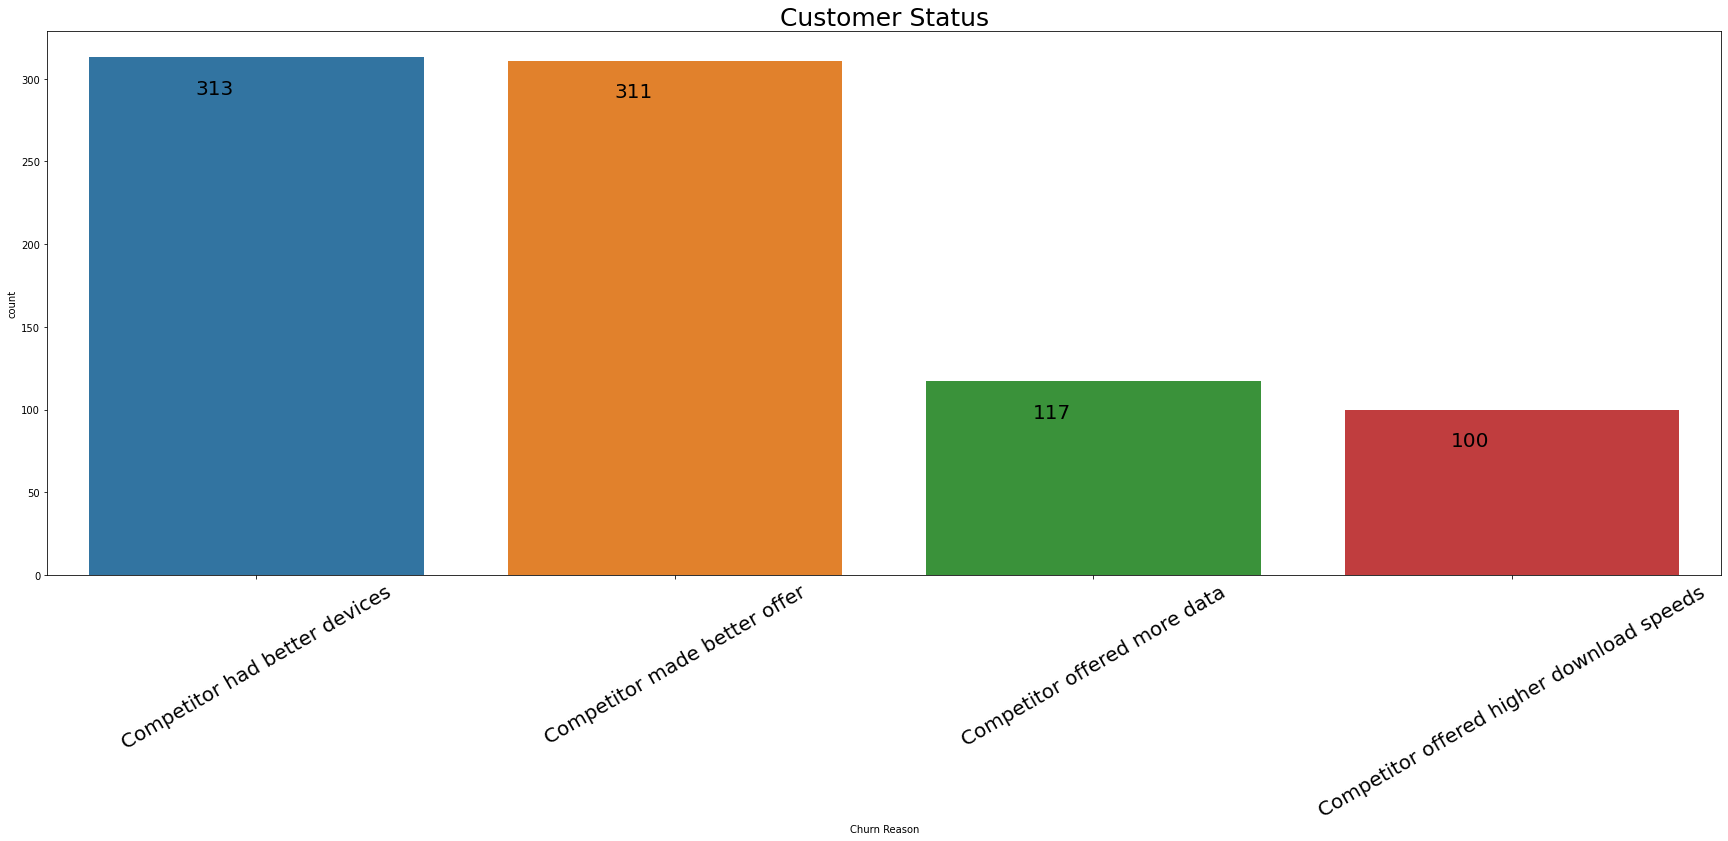

In [46]:
competitor = telecom_data[telecom_data["Churn Category"]=="Competitor"]
plt.figure(figsize=(30,10))
ax= sns.countplot(data= competitor,x= "Churn Reason")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.30, p.get_height()), ha='center', va='top', color='black', size=20)

plt.xticks(fontsize = 20,rotation=30)
plt.title('Customer Status', fontsize = 25)

plt.show()


From Above graph we conclude that customer is leaving beacuse of better offer and better device of other telecom service

# Correlation

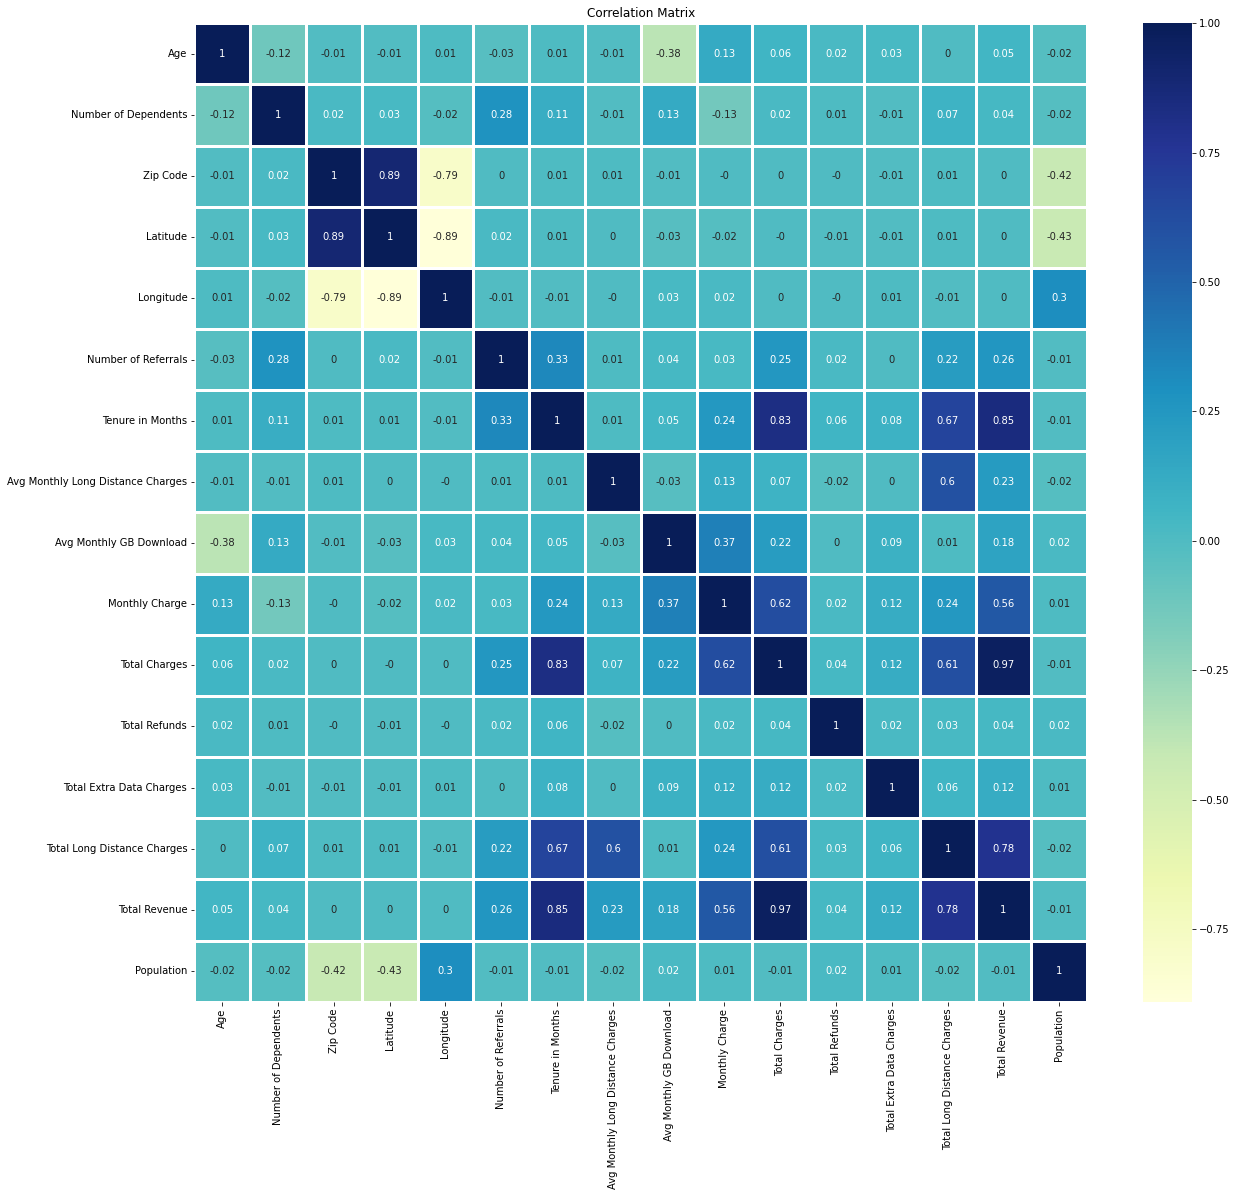

In [47]:
plt.figure(figsize=(20,18))
sns.heatmap(round(telecom_data.corr(),2),annot=True, linewidths=3, cmap='YlGnBu',fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

With below matrix we can state that variables are not highly correlated with each other


# Converting Categorical date to Numerical

In [48]:

for i in telecom_data:
    print({i:telecom_data[i].unique()})

{'Gender': array(['Female', 'Male'], dtype=object)}
{'Age': array([37, 32, 72, 46, 48, 57, 44, 49, 50, 52, 38, 78, 30, 60, 61, 75, 70,
       71, 23, 25, 69, 67, 47, 20, 77, 73, 68, 28, 54, 53, 43, 45, 56, 36,
       24, 58, 35, 26, 64, 39, 74, 65, 79, 33, 21, 55, 80, 42, 22, 19, 34,
       62, 63, 41, 40, 59, 31, 76, 29, 66, 27, 51], dtype=int64)}
{'Married': array(['Yes', 'No'], dtype=object)}
{'Number of Dependents': array([0, 3, 4, 1, 2, 5, 6, 7, 9, 8], dtype=int64)}
{'City': array(['Frazier Park', 'Glendale', 'Costa Mesa', ..., 'Jacumba',
       'Carpinteria', 'Meadow Valley'], dtype=object)}
{'Zip Code': array([93225, 91206, 92627, ..., 91934, 93013, 95956], dtype=int64)}
{'Latitude': array([34.827662, 34.162515, 33.645672, ..., 32.649787, 34.441398,
       39.937017])}
{'Longitude': array([-118.999073, -118.203869, -117.922613, ..., -116.2237  ,
       -119.513163, -121.058043])}
{'Number of Referrals': array([ 2,  0,  8,  1,  3,  4,  7,  9,  6,  5, 10, 11], dtype=int64)}
{'Tenu

In [49]:
colname=[]


for x in telecom_data:
    if telecom_data[x].dtype=='object':
        colname.append(x)
        
colname

['Gender',
 'Married',
 'City',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Customer Status',
 'Churn Category',
 'Churn Reason',
 'is_churned']

In [50]:
from sklearn import preprocessing

le= preprocessing.LabelEncoder()

for x in colname:
    if x == 'Customer Status':
        continue
    telecom_data[x]= le.fit_transform(telecom_data[x])

In [51]:
telecom_data.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population,is_churned
0,0,37,1,0,346,93225,34.827662,-118.999073,2,9,0,1,42.39,0,1,0,16.0,0,2,0,2,2,0,0,2,1,1,1,65.60,593.3,0.00,0,381.51,974.81,Stayed,3,15,4498,1
1,1,32,0,0,346,93225,34.827662,-118.999073,0,10,4,1,45.69,0,1,2,11.0,0,0,0,2,2,2,2,2,0,1,1,95.10,865.1,43.25,0,456.90,1278.75,Stayed,3,15,4498,1
2,0,72,1,0,346,93225,34.827662,-118.999073,8,58,2,1,47.34,2,1,2,28.0,0,0,0,2,2,2,2,2,0,1,0,100.40,5749.8,0.00,0,2745.72,8495.52,Stayed,3,15,4498,1
3,1,46,0,0,346,93225,34.827662,-118.999073,0,59,0,1,9.70,0,1,1,6.0,0,0,2,0,0,2,2,2,1,1,0,61.35,3645.5,0.00,0,572.30,4217.80,Stayed,3,15,4498,1
4,1,46,0,0,368,91206,34.162515,-118.203869,0,9,0,1,10.69,2,1,0,10.0,0,0,0,0,0,2,2,0,0,0,1,-4.00,542.4,38.33,10,96.21,610.28,Stayed,3,15,31297,1


# Create X and Y

In [52]:
Y=telecom_data["Customer Status"]
X=telecom_data.drop('Customer Status',axis=1)

In [53]:
X.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn Reason,Population,is_churned
0,0,37,1,0,346,93225,34.827662,-118.999073,2,9,0,1,42.39,0,1,0,16.0,0,2,0,2,2,0,0,2,1,1,1,65.60,593.3,0.00,0,381.51,974.81,3,15,4498,1
1,1,32,0,0,346,93225,34.827662,-118.999073,0,10,4,1,45.69,0,1,2,11.0,0,0,0,2,2,2,2,2,0,1,1,95.10,865.1,43.25,0,456.90,1278.75,3,15,4498,1
2,0,72,1,0,346,93225,34.827662,-118.999073,8,58,2,1,47.34,2,1,2,28.0,0,0,0,2,2,2,2,2,0,1,0,100.40,5749.8,0.00,0,2745.72,8495.52,3,15,4498,1
3,1,46,0,0,346,93225,34.827662,-118.999073,0,59,0,1,9.70,0,1,1,6.0,0,0,2,0,0,2,2,2,1,1,0,61.35,3645.5,0.00,0,572.30,4217.80,3,15,4498,1
4,1,46,0,0,368,91206,34.162515,-118.203869,0,9,0,1,10.69,2,1,0,10.0,0,0,0,0,0,2,2,0,0,0,1,-4.00,542.4,38.33,10,96.21,610.28,3,15,31297,1


In [54]:
Y.head()

0    Stayed
1    Stayed
2    Stayed
3    Stayed
4    Stayed
Name: Customer Status, dtype: object

# Scaling Data using standard Scaler

In [55]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaler.fit(X)

X= scaler.transform(X)
print(X)

[[-1.00955867 -0.56777322  1.03453023 ...  0.46113445 -0.83408322
   0.60102348]
 [ 0.99053183 -0.86629561 -0.96662231 ...  0.46113445 -0.83408322
   0.60102348]
 [-1.00955867  1.5218835   1.03453023 ...  0.46113445 -0.83408322
   0.60102348]
 ...
 [ 0.99053183 -1.46334039 -0.96662231 ...  0.46113445 -1.03251457
   0.60102348]
 [ 0.99053183 -0.44836427 -0.96662231 ... -0.76869323 -1.03251457
  -1.66382851]
 [-1.00955867  0.56661186  1.03453023 ...  0.46113445 -1.03251457
   0.60102348]]


# Split the data into Train and Test

In [56]:
from sklearn.model_selection import train_test_split
  
# split into 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 10)
  

In [57]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5634, 38)
(1409, 38)
(5634,)
(1409,)


# SMOTE

#while doing EDA we observed that data is imablanced hence we are using SMOTE technique to make data balanced

In [43]:
print("Before OverSampling, counts of label 'Churned': ", (sum(Y_train == 'Churned')))
print("Before OverSampling, counts of label 'Stayed': ", (sum(Y_train == 'Stayed')))
print("Before OverSampling, counts of label 'Joined': ", (sum(Y_train == 'Joined')))
  
# import SMOTE from imblearn library 
# we train model in SMOTE only on training date
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X, Y)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label 'Churned': ", (sum(Y_train_res == 'Churned')))
print("After OverSampling, counts of label 'Stayed': ", (sum(Y_train_res == 'Stayed')))
print("After OverSampling, counts of label 'Joined': ", (sum(Y_train_res == 'Joined')))

Before OverSampling, counts of label 'Churned':  1493
Before OverSampling, counts of label 'Stayed':  3792
Before OverSampling, counts of label 'Joined':  349
After OverSampling, the shape of train_X:  (14160, 38)
After OverSampling, the shape of train_y:  (14160,)
After OverSampling, counts of label 'Churned':  4720
After OverSampling, counts of label 'Stayed':  4720
After OverSampling, counts of label 'Joined':  4720


In [44]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X_train_res, Y_train_res, test_size = 0.2, 
                                                    random_state = 10)
  

In [45]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(11328, 38)
(2832, 38)
(11328,)
(2832,)


# Applying ML algorithms

## 1. Logistic Regression

In [58]:
# model building

from sklearn.linear_model import LogisticRegression

#create a model
classifier =LogisticRegression()
#fitting training data to the model

classifier.fit(X_train, Y_train)

Y_pred= classifier.predict(X_test)
print(Y_pred)

['Stayed' 'Churned' 'Stayed' ... 'Stayed' 'Churned' 'Stayed']


In [59]:
print(list(zip(telecom_data.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('Gender', 0.00927207781944696), ('Age', 0.016848569660792585), ('Married', 0.2924489860910528), ('Number of Dependents', -0.2225585581054108), ('City', 0.056276993491077655), ('Zip Code', 0.0038228525622710174), ('Latitude', 0.03529223567858066), ('Longitude', 0.016307847404135642), ('Number of Referrals', -0.30117781723654896), ('Tenure in Months', 1.8713268650178785), ('Offer', -0.0896287946890985), ('Phone Service', -0.038705484522321046), ('Avg Monthly Long Distance Charges', 0.015407855794777601), ('Multiple Lines', 0.18870212563820124), ('Internet Service', 0.03995239154166714), ('Internet Type', 0.033570129197763574), ('Avg Monthly GB Download', -0.03524536690966165), ('Online Security', 0.1082282356391485), ('Online Backup', 0.035257376849399044), ('Device Protection Plan', 0.05623834061409184), ('Premium Tech Support', 0.04731855934551236), ('Streaming TV', 0.07840173495750026), ('Streaming Movies', 0.04797236143675997), ('Streaming Music', 0.01617718114897884), ('Unlimited 

In [60]:
 from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[376   0   0]
 [  0 100   5]
 [  0   9 919]]
Classification report: 
              precision    recall  f1-score   support

     Churned       1.00      1.00      1.00       376
      Joined       0.92      0.95      0.93       105
      Stayed       0.99      0.99      0.99       928

    accuracy                           0.99      1409
   macro avg       0.97      0.98      0.98      1409
weighted avg       0.99      0.99      0.99      1409

Accuracy of the model:  0.9900638750887154


# KNN

In [61]:
#Building the model:

from sklearn.neighbors import KNeighborsClassifier
model_KNN= KNeighborsClassifier(n_neighbors= int(np.sqrt(len(X_train))),
                               metric= 'minkowski')

#euclidean, manhattan, minkowski
#fit the model on the data and predict the values

model_KNN.fit(X_train, Y_train)

Y_pred= model_KNN.predict(X_test)
print(list(zip(Y_test, Y_pred)))

[('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Joined', 'Stayed'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Churned', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Churned', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Churn

In [62]:
#to check sqrt value
np.sqrt(len(X_train))

75.05997601918082

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[314   0  62]
 [  0   5 100]
 [  0   1 927]]
Classification report: 
              precision    recall  f1-score   support

     Churned       1.00      0.84      0.91       376
      Joined       0.83      0.05      0.09       105
      Stayed       0.85      1.00      0.92       928

    accuracy                           0.88      1409
   macro avg       0.89      0.63      0.64      1409
weighted avg       0.89      0.88      0.85      1409

Accuracy of the model:  0.8843151171043293


#Manhattan- Accuracy of the model: 0.8499293785310734

#eculidian- Accuracy of the model: 0.8075564971751412

#minkowski-Accuracy of the model: 0.8075564971751412

## Tunnning KNN mode

In [64]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,30):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="manhattan")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

 



Accuracy is  0.9034776437189496 for K-Value: 1
Accuracy is  0.9056068133427964 for K-Value: 2
Accuracy is  0.915542938254081 for K-Value: 3
Accuracy is  0.9283179559971612 for K-Value: 4
Accuracy is  0.9247693399574166 for K-Value: 5
Accuracy is  0.9276082327892122 for K-Value: 6
Accuracy is  0.921930447125621 for K-Value: 7
Accuracy is  0.9268985095812633 for K-Value: 8
Accuracy is  0.9226401703335699 for K-Value: 9
Accuracy is  0.9261887863733144 for K-Value: 10
Accuracy is  0.9233498935415189 for K-Value: 11
Accuracy is  0.9240596167494677 for K-Value: 12
Accuracy is  0.9283179559971612 for K-Value: 13
Accuracy is  0.9240596167494677 for K-Value: 14
Accuracy is  0.9226401703335699 for K-Value: 15
Accuracy is  0.9233498935415189 for K-Value: 16
Accuracy is  0.9226401703335699 for K-Value: 17
Accuracy is  0.9254790631653655 for K-Value: 18
Accuracy is  0.9233498935415189 for K-Value: 19
Accuracy is  0.921930447125621 for K-Value: 20
Accuracy is  0.9205110007097232 for K-Value: 21
Accu

In [65]:
 for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

4 : 0.9283179559971612
13 : 0.9283179559971612


In [81]:
#if 2 K values giving same  accuracy, use higher K value

from sklearn.neighbors import KNeighborsClassifier
model_KNN= KNeighborsClassifier(n_neighbors= 4,
                               metric= 'manhattan')

#euclidean, manhattan, minkowski
#fit the model on the data and predict the values

model_KNN.fit(X_train, Y_train)

Y_pred= model_KNN.predict(X_test)
print(list(zip(Y_test, Y_pred)))

[('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Joined', 'Joined'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Stayed', 'Joined'), ('Stayed', 'Stayed'), ('Stayed', 'Joined'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Stayed', 'Joined'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Churned', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Churned', 'Churned'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Stayed', 'Stayed'), ('Chur

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[353   4  19]
 [  0  76  29]
 [  0  49 879]]
Classification report: 
              precision    recall  f1-score   support

     Churned       1.00      0.94      0.97       376
      Joined       0.59      0.72      0.65       105
      Stayed       0.95      0.95      0.95       928

    accuracy                           0.93      1409
   macro avg       0.85      0.87      0.86      1409
weighted avg       0.94      0.93      0.93      1409

Accuracy of the model:  0.9283179559971612


# SVM

In [68]:
from sklearn.svm import SVC

svc_model= SVC()
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

['Stayed', 'Churned', 'Stayed', 'Churned', 'Stayed', 'Churned', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Churned', 'Stayed', 'Stayed', 'Churned', 'Churned', 'Stayed', 'Joined', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Churned', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Churned', 'Joined', 'Churned', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Churned', 'Churned', 'Churned', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Churned', 'Joined', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', '

In [69]:
svc_model.score(X_train, Y_train)

0.9795882144124956

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[376   0   0]
 [  0  54  51]
 [  0  27 901]]
Classification report: 
              precision    recall  f1-score   support

     Churned       1.00      1.00      1.00       376
      Joined       0.67      0.51      0.58       105
      Stayed       0.95      0.97      0.96       928

    accuracy                           0.94      1409
   macro avg       0.87      0.83      0.85      1409
weighted avg       0.94      0.94      0.94      1409

Accuracy of the model:  0.9446415897799858


### Tunning SVM model

In [71]:
#grid serch CV to find best value of kernel , gamma and c
from sklearn import svm

svc_model = svm.SVC() #kernel="rbf"

parameter_space = {
     'kernel': ["linear","rbf","poly","sigmoid"],
    'gamma': [0.1,0.01,0.001],
    'C': [1,5,8,10,20]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svc_model, parameter_space, n_jobs=-1, cv=5)



In [72]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 8, 10, 20], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'C': 20, 'gamma': 0.1, 'kernel': 'linear'}


In [79]:


from sklearn.svm import SVC

svc_model= SVC(kernel='rbf', C=20, gamma=0.1)
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

['Stayed', 'Churned', 'Stayed', 'Churned', 'Stayed', 'Churned', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Joined', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Churned', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Churned', 'Joined', 'Churned', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Churned', 'Churned', 'Churned', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Churned', 'Joined', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Sta

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[355   0  21]
 [  0  41  64]
 [  0  25 903]]
Classification report: 
              precision    recall  f1-score   support

     Churned       1.00      0.94      0.97       376
      Joined       0.62      0.39      0.48       105
      Stayed       0.91      0.97      0.94       928

    accuracy                           0.92      1409
   macro avg       0.85      0.77      0.80      1409
weighted avg       0.92      0.92      0.92      1409

Accuracy of the model:  0.921930447125621


# Random Forest

In [77]:
# Predicting using the ramdom_forest_classifier


from sklearn.ensemble import RandomForestClassifier

model_RandomForest= RandomForestClassifier(n_estimators=50,   # no of DT
                                           random_state=10, max_depth=5, bootstrap= True)

#fit the model on the data and predict the values

model_RandomForest.fit(X_train, Y_train)

Y_pred= model_RandomForest.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test,Y_pred))

[[376   0   0]
 [  0 105   0]
 [  0   0 928]]
Classification report: 
Accuracy of the model:  1.0
              precision    recall  f1-score   support

     Churned       1.00      1.00      1.00       376
      Joined       1.00      1.00      1.00       105
      Stayed       1.00      1.00      1.00       928

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



We observed that all 'churned' and 'joined' customers are getting identified correctly 
without any missclassification

5 'Stayed' customers are getting misscalssified as joined


# Comparing Accuracy of all applied model

#### Accuracy of the Logistic Regression Model:  0.9918785310734464

#### Accuracy of the Base KNN Model:  0.8499293785310734

#### Accuracy of the Tunned KNN Model:  0.9505649717514124

#### Accuracy of the SVM Model:  0.9837570621468926

#### Accuracy of the Tunned SVM Model:  0.993997175141243

#### Accuracy of the Random forest Model:  0.9982344632768362

#OUTPUT - We have evaluated different model on the basis of classification report, Accuracy, and confusion matrix and after applying models on testing data we found that 'Random Forest Model' worked best in predicting highest accuracy

***

# Conclusion

1. The model predicts 99% of customer those who will churn. So telecom operators can contact them to solve their issues 
and try to retain them.


2. For the customer having high monthly charges, the company should try to provide them some additional service or give some 
exciting offers to decrease the churn rate 


3. This Model will help Retention Team/ Business Team to analyze high risk churn customers before they leave the company.



# References

In [67]:
#https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics

***

THANK YOU

***